<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Без-учёта-классов" data-toc-modified-id="Без-учёта-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Без учёта классов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Меня зовут Тимонина Анастасия, это один из моих проектов, ниже вы найдете его описание, а затем и подробное выполнение. 

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Для начала получим общую информацию о данных. Импортируем нужные библиотеки. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score, 
                             confusion_matrix,
                             roc_curve, 
                             roc_auc_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.datasets import make_classification
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

Откроем файл

In [ ]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Получим общую информацию о датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Типы данных совпадают с ожидаемыми. Есть пропуски в столбце 'Tenure' - сколько лет человек является клиентом банка, возможно, это обусловлено тем, что клиент только недавно стал клиентом и целого количества лет еще нет, следовательно, надо заменить такие значения на 0. Названия столбцов придется поменять: многие написаны с заглавной буквы, это неудобно. 

In [ ]:
df['Tenure'] = df['Tenure'].fillna(0)

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

Аналогично поступим и со значениями в столбцах.

In [ ]:
for i in ['surname','geography','gender']:
    df[i] = df[i].str.lower()

Все заголовки столбцов и значения категориальных признаков стали единого шрифта, но требуется еще разделить названия некоторых столбцов с помощью "_". 

In [ ]:
df = df.rename(columns={'rownumber':'row_number',
                       'creditscore':'credit_score',
                       'numofproducts':'num_of_products',
                       'hascrcard':'has_cr_card',
                       'isactivemember':'is_active_member',
                       'estimatedsalary':'estimated_salary',
                       'customerid':'customer_id'})
df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,hargrave,619,france,female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,boni,699,france,female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,mitchell,850,spain,female,43,2.0,125510.82,1,1,1,79084.10,0


Теперь данные готовы к проверке на дубликаты.

In [ ]:
df.duplicated().sum()

0

Дубликатов нет.

### Вывод
- импортировали нужные библиотеки
- переименовали столбцы
- значения столбцов сделали также строчными буквами
- дубликатов нет

## Исследование задачи

На этом этапе выясним баланс классов целевого признака. Обучим модель без учета дисбаланса. Но сначала разобьем данные на признаки и целевой признак. Такие признаки как 'row_number', 'customer_id', 'surname' удалим, так как они не несут важной для обучения информации.

In [ ]:
features = df.drop(['exited','row_number', 'customer_id', 'surname'],axis=1) 
target = df['exited'] 

Теперь преобразуем таблицу с признаками техникой OHE.

In [ ]:
features = pd.get_dummies(features,drop_first=True)
features.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0


А теперь разобьем получившиеся датасеты на несколько выборок: обучающую, валидационную и тестовую в соотношении 3:1:1. 

In [ ]:
#отделим 40% от features, target
features_train, features_study,target_train,target_study = train_test_split(
    features, target, test_size=0.4, random_state=12345) 

#разделим еще пополам
features_test,features_valid,target_test,target_valid=train_test_split(
    features_study, target_study, test_size=0.5, random_state=12345,stratify=target_study) 

Проверяем корректность разбиения

In [ ]:
features_train.shape,target_train.shape,features_test.shape,features_valid.shape,target_test.shape,target_valid.shape

((6000, 11), (6000,), (2000, 11), (2000, 11), (2000,), (2000,))

Выборки разбиты в верном соотношении. Масштабируем признаки.

In [ ]:
pd.options.mode.chained_assignment = None

scaler = StandardScaler()

num_columns = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler.fit(features_train[num_columns])
features_train[num_columns] = scaler.transform(features_train[num_columns])
features_valid[num_columns] = scaler.transform(features_valid[num_columns])
features_test[num_columns] = scaler.transform(features_test[num_columns])

type(features_train)

pandas.core.frame.DataFrame

### Без учёта классов

Проверим, есть ли дисбаланс классов в целевом признаке.

In [ ]:
df['exited'].value_counts(normalize=True) 

0    0.7963
1    0.2037
Name: exited, dtype: float64

Отобразим это на графике.

Text(0.5, 1.0, 'Дисбаланс классов')

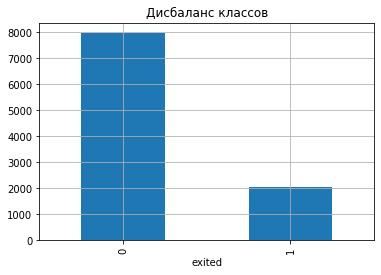

In [ ]:
df.groupby('exited')['gender'].count().plot(kind='bar',
                                            x='genre', 
                                            y='total_sales', 
                                            grid=True)
plt.title('Дисбаланс классов')

Ушедших клиентов явно меньше оставшихся. Для начала обучим модель без учета дисбаланса 

In [ ]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.3063380281690141


Метрика F-1 показала низкий результат. Построим ROC-кривую.

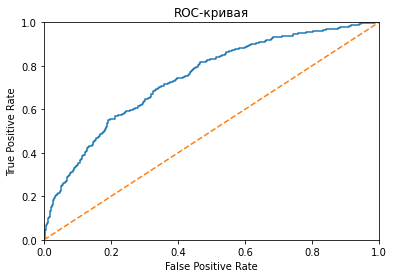

In [ ]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели  - прямая
plt.plot([0, 1], [0, 1], linestyle='--')

#   установим границы осей от 0 до 1 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#   подпишем оси "False Positive Rate" и "True Positive Rate" 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.title('ROC-кривая')
plt.show()

На графике отметим, что TPR находится на небольшом расстоянии от случайно модели, что свидетельствует о её низком качестве. Теперь измерим показатель AUC-ROC.

In [ ]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.7422603978300182

Значение в 0.64 - немного выше случайной модели.  Качество оставляет желать лучшего, можно предположить, что проблема в дисбалансе классов. Проверим еще одну модель - случайный лес на тех же данных, возможно метрика будет лучше. Сначала подберем параметры для нее c помощью функции count_trees.

In [ ]:
def count_trees(features,target,features_valid,target_valid):
    best_model_forest = None
    best_result = 0
    best_est=0
    best_depth=0
    
    for est in range(1, 30):  #перебираем значения для количества деревьев
        for depth in range(1,15): #перебираем значения для глубины дерева
            
            model = RandomForestClassifier(random_state=12345, n_estimators=est,max_depth=depth) 
            model.fit(features,target) 
            predicted_valid = model.predict(features_valid)
            result = f1_score(target_valid, predicted_valid)
            
            if result > best_result: #сохраняем лучший результат, если он выше предыдущего
                best_model_forest = model 
                best_result = result 
                
    return [best_model_forest,best_result]

Подставим наши данные. 

In [ ]:
count_trees(features_train,target_train,features_valid,target_valid)

[RandomForestClassifier(max_depth=12, n_estimators=19, random_state=12345),
 0.5705705705705706]

Проверяем метрики на случайном лесе с параметраметрами: глубина - 12 и количество деревьев - 14.

In [ ]:
#зададим модель случайного леса
model = RandomForestClassifier(random_state=12345, max_depth=12,n_estimators=20)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC:", auc_roc)

F1: 0.5683890577507599
AUC_ROC: 0.8466674201326101


Уже виден прогресс даже с дисбалансом классов, поэтому для дельнейших действий выберем эту модель.

### Вывод
 - В датасете явно отличается количество тех, кто ушел из банка и тех, кто остался. Выше мы не учитывали этот дисбаланс, соответственно предполагаем это как основную причину низкого значения метрики f-1. 
 - Была построена модель линейной регрессии и вычислены метрики f-1 и auc-roc. Показатели низкие.
 - Был построен график линейной регресии и случайной модели, заметим небольшое расстояние между ними. Его надо увеличить: чем выше график, тем больше TPR и тем лучше качество модели.
 - Метрики f-1 и auc-roc были найдены и на модели случайного леса. Показатели выше, чем у регрессии. Выбираем её для дальнейшего исследования.
 - Предполагаем, что учитывая дисбаланс можно улучшить качество модели. 

## Борьба с дисбалансом

Сделаем вес классов сбалансированным. Проверим, изменится ли мера f-1.

In [ ]:
model = RandomForestClassifier(random_state=12345, class_weight='balanced', max_depth=12, n_estimators=20)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC:", auc_roc)

F1: 0.5805592543275633
AUC_ROC: 0.8314624773960217


Изменив вес и сбалансировав классы, удалось изменить меру f-1. Применим технику upsample, т.е. увеличим количество редких значений, обучим модель на них, изменится ли после этого показатель? Для начала создадим функцию.

In [ ]:
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0] #поделим на отрицательные и положительные
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) #увеличим кол-во положительных объектов
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)    #и объединим их с отрицательными
    
    features_upsampled, target_upsampled = shuffle(    #перемешаем для лучшего обучения
        features_upsampled, target_upsampled, random_state=12345)  
    
    return features_upsampled, target_upsampled

Подставим наши данные в эту функцию.

In [ ]:
#преобразуем данные с помощью функции upsample
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = RandomForestClassifier(random_state=12345, class_weight='balanced', max_depth=12, n_estimators=20)
model.fit(features_upsampled, target_upsampled)

predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC:", auc_roc)

F1: 0.6041666666666667
AUC_ROC: 0.8374080771549126


Значение F-1 выросло, стало больше чем 0.59. Теперь проверим технику downsample. Напишем функцию.

In [ ]:
def downsample(features, target, fraction):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat( #сократим отрицательные объекты и объединим их с положительными
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])    
    
    features_downsampled, target_downsampled = shuffle( #перемешаем для лучшего обучения
        features_downsampled, target_downsampled, random_state=12345)    
    
    return features_downsampled, target_downsampled

Подставим в новую функцию наши данные. 

In [ ]:
#подставим данные в функцию downsample
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = RandomForestClassifier(random_state=12345, class_weight='balanced', max_depth=12, n_estimators=20)
model.fit(features_downsampled, target_downsampled)

predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC:", auc_roc)

F1: 0.5813084112149532
AUC_ROC: 0.834080771549126


Проверим, как себя будет вести модель логистической регрессии после работы с дисбалансом, применяя upsample.

In [ ]:
#применяем технику upsample
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

#на модели логистической регрессии
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC:", auc_roc)

F1: 0.4688581314878893
AUC_ROC: 0.7457142857142858


Показатели ниже, проверим технику downsample.

In [ ]:
#применяем технику downsample
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

#на модели логистической регрессии
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC:", auc_roc)

F1: 0.47668393782383417
AUC_ROC: 0.7472830018083183


Лучше, чем без учёта дисбаланса, но хуже, чем показатели на случайном лесе.

### Вывод
- После взвешивания классов параметр f-1 изменился в большую сторону на случайном лесе
- Было применено 2 способа борьбы с дисбалансом, в обоих случаях мера f-1 увеличилась
- При upsample на случайном лесе мера f-1 увеличилась до 0.608 для этого пришлось увеличить количество положительных объектов в 4 раза
- При downsample на случайном лесе f-1 увеличилась до 0.592 для этого пришлось сократить на четверть отрицательные объекты 
- На модели логистической регрессии f-1 также увеличилась по сравнению со значением без учета дисбаланса, однако по сравнению с моделью случайного леса показатель низкий. 

## Тестирование модели

Проведем тестирование на лучшей модели. Проверим метрику f-1.

In [ ]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = RandomForestClassifier(random_state=12345, class_weight='balanced', max_depth=12, n_estimators=20)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print("AUC_ROC:", auc_roc)

F1: 0.5988571428571428
AUC_ROC: 0.8383579613062778


## Общий вывод
Для проведения исследования понадобилось 
- заменить на нули пропуски в столбце 'Tenure', 
- переименовать столбцы, 
- сделать их одного размера. 

Проверка на дубликаты показала, что их нет. 

Затем исследован дисбаланс классов. 
- Он составил практически 4:1. 
- Построены 2 обучающие модели: логистическая регрессия и случайный лес.
- Логистическая регрессия показала наихудший результат метрики f-1 и auc-roc
- Для леса с помощью функции были подобраны параметры, которые улучшили f-1 и auc-roc в несколько раз, поэтому на ней остановились

Для борьбы с дисбалансом:
- был добавлен параметр class_weight='balanced'
- применены 2 способа улучшения качества модели upsampling и downsampling
- оба способа улучшили метрики f-1 и auc-roc, но upsampling немного лучше

Тестирование 
- по показателям была выбрана техника upsampling
- результат f-1 доведен до 0.6, а показатель auc-roc имеет достаточно высокое значение 0.84.